While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness, as we saw with the scatter plot of the Labeled Faces in the Wild dataset. There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

Manifold learning algorithms, like t-SNE, are primarily used for visualization and cannot generate more than two new features. They can only transform the trained data, making them useful for exploratory data analysis but not for supervised learning. t-SNE aims to find a two-dimensional representation of data that preserves distances between points, focusing on points close to each other rather than far apart.

We will apply the t-SNE manifold learning algorithm on a dataset of handwritten digits that is included in scikit-learn.2 Each data point in this dataset is an 8×8 grayscale image of a handwritten digit between 0 and 1. 

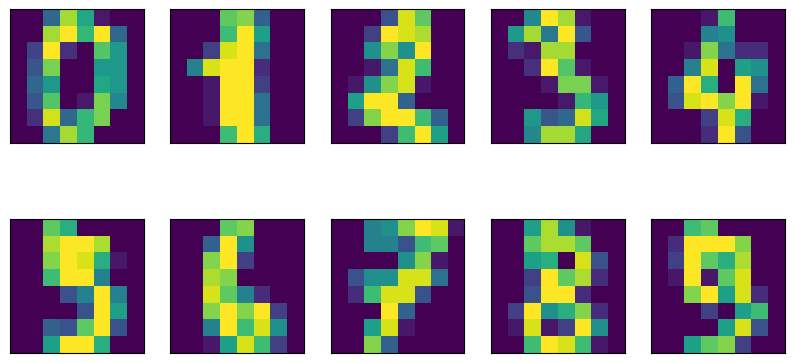

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize = (10, 5),
                            subplot_kw = {'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two principal components, and color each dot by its class 

Text(0, 0.5, 'Second principal component')

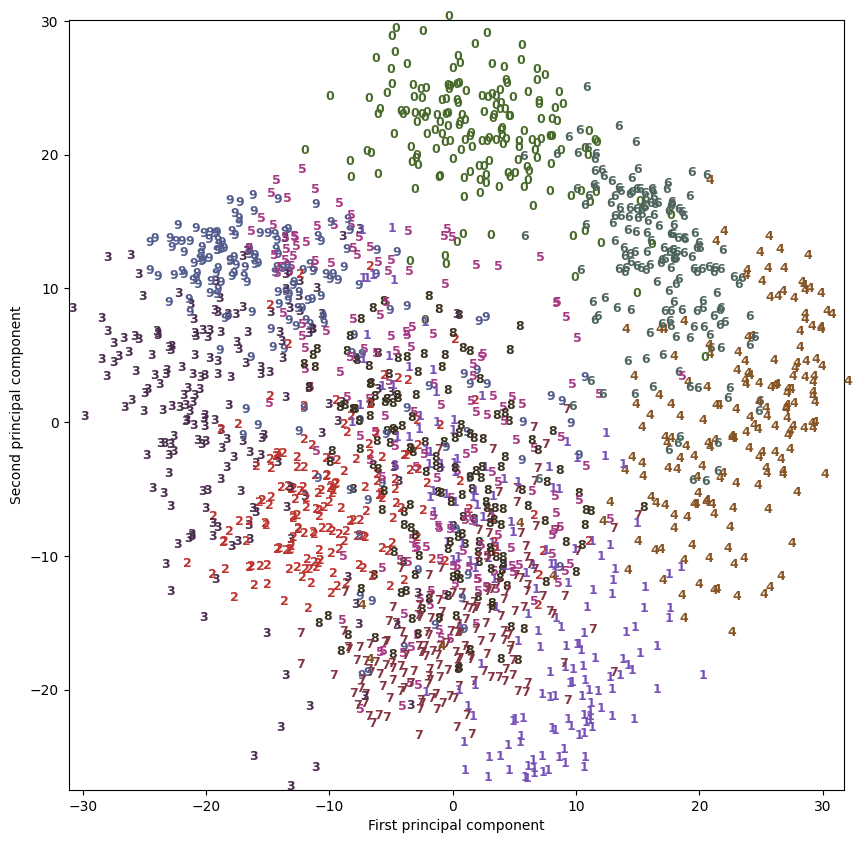

In [3]:
from sklearn.decomposition import PCA

# build a PCA model
pca = PCA(n_components = 2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Here, we actually used the true digit classes as glyphs, to show which class is where. The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly

Let's apply t-SNE to the same dataset and compare the results. As t-SNE does not have a transform method, we will use the fit_transform method to perform the transformation in one step.

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0.5, 0, 't-SNE feature 1')

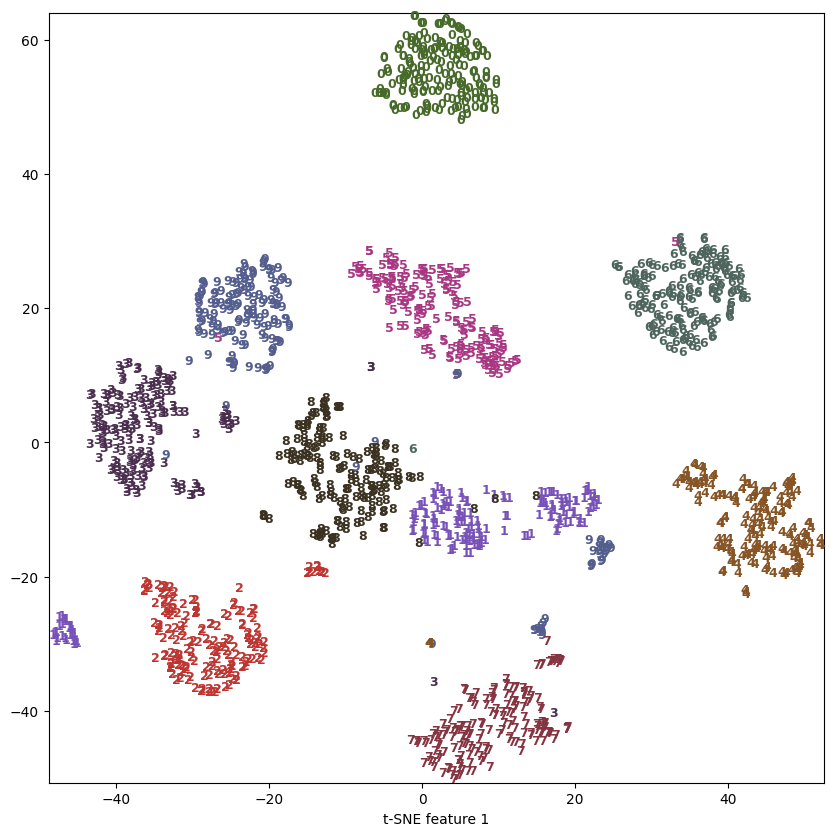

In [5]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
# actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. The ones and nines are somewhat split up, but most of the classes form a single dense group. Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised. Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space.

The t-SNE algorithm has some tuning parameters, though it often works well with the default settings. You can try playing with <code>perplexity</code> and <code>early_exaggeration</code>, but the effects are usually minor.